<b><font size="30">INITIALIZATION</font></b>

In [8]:
import numpy as np
import pandas as pd
import quandl
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Fetching data using Quandl
df = quandl.get("FINRA/FNYX_GOOGL", authtoken="knso8NxM2d6x_JtssaqB")
df.fillna(-99999, inplace=True)  # Handling missing values (outliers) in the dataset
df.tail()

,ShortVolume,ShortExemptVolume,TotalVolume
Date,,,
2023-07-26,798544.0,27005.0,3866577.0
2023-07-27,411380.0,13657.0,2696068.0
2023-07-28,285628.0,13763.0,1501936.0
2023-07-31,208655.0,17314.0,992754.0
2023-08-01,117803.0,4911.0,1355334.0


<b><font size="30">FORECAST</font></b>

In [9]:
forecast_col = 'ShortVolume'
forecast_out = int(math.ceil(0.001 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

x = np.array(df.drop(['label'], 1))  # Features
y = np.array(df['label'])  # Labels

x = preprocessing.scale(x)
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)

print("Regression Model Accuracy:", accuracy)
# Printing forecast_out
print("\nForecast Period (forecast_out):", forecast_out)
df.tail()

Regression Model Accuracy: 0.37252118086538233

Forecast Period (forecast_out): 3


C:\Users\hp\AppData\Local\Temp/ipykernel_2296/768461938.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['label'], 1))  # Features


,ShortVolume,ShortExemptVolume,TotalVolume,label
Date,,,,
2023-07-21,4624607.0,10988.0,5700386.0,798544.0
2023-07-24,397961.0,7729.0,1387130.0,411380.0
2023-07-25,510914.0,23079.0,2384889.0,285628.0
2023-07-26,798544.0,27005.0,3866577.0,208655.0
2023-07-27,411380.0,13657.0,2696068.0,117803.0


<b><font size="20">VISUALIZATION</font></b>

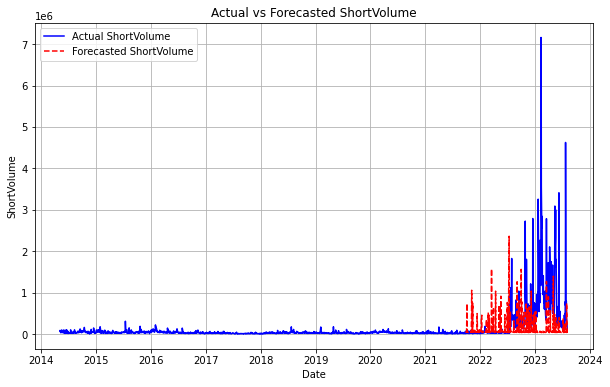

In [3]:
plt.figure(figsize=(10, 6))

# Plotting actual ShortVolume data
plt.plot(df.index, df[forecast_col], color='blue', label='Actual ShortVolume')

# Plotting forecasted ShortVolume data with red dashed line
plt.plot(df.index[-len(x_test):], clf.predict(x_test), color='red', linestyle='dashed', label='Forecasted ShortVolume')

plt.title("Actual vs Forecasted ShortVolume")
plt.xlabel("Date")
plt.ylabel("ShortVolume")
plt.legend()
plt.grid(True)
plt.show()